In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from scipy.optimize import linprog
import matplotlib.pyplot as plt

# Importing Dataset

In [2]:
data = pd.read_csv("dataset.csv")

In [3]:
data.head()

first_subject  second_subject  admitted_or_not
0      34.623660       78.024693                0
1      30.286711       43.894998                0
2      35.847409       72.902198                0
3      60.182599       86.308552                1
4      79.032736       75.344376                1

In [4]:
X=data.iloc[:,0:2]
Y=list(data.iloc[:,-1])
number_of_cols=X.shape[1]

# DATA PREPARATION(TO MAKE DATA SET LINEARLY SEPARABLE) :


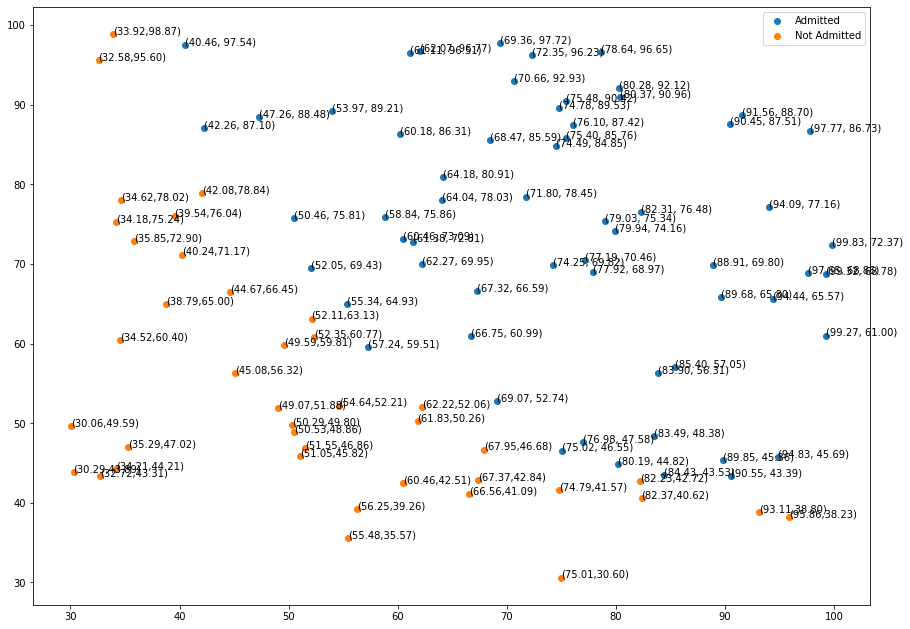

In [5]:
admitted = data.loc[data.admitted_or_not == 1]
not_admitted = data.loc[data.admitted_or_not == 0]
admitted_1st_col = admitted.iloc[:, 0];
admitted_2nd_col = admitted.iloc[:, 1];

not_admitted_1st_col = not_admitted.iloc[:, 0];
not_admitted_2nd_col = not_admitted.iloc[:, 1];

fig, ax = plt.subplots(figsize=(15, 11))
plt.scatter(admitted_1st_col,admitted_2nd_col,label='Admitted')
for x, y in zip(admitted_1st_col, admitted_2nd_col):
    plt.text(x, y, '({:.2f}, {:.2f})'.format(x, y))
    
    
plt.scatter(not_admitted_1st_col,not_admitted_2nd_col,label='Not Admitted')
for x, y in zip(not_admitted_1st_col, not_admitted_2nd_col):
    plt.text(x, y, '({:.2f},{:.2f})'.format(x, y))
    
plt.legend()
plt.show()

### Clearly dataset is not linearly separable. have manually adjusted some points so that the dataset become linearly separable.

In [6]:
data.at[57,'first_subject']=30
data.at[36,'first_subject']=29
data.at[86,'first_subject']=35
data.at[32,'first_subject']=45
data.at[89,'first_subject']=44
data.at[27,'first_subject']=50
data.at[10,'first_subject']=55
data.at[45,'first_subject']=48
data.at[28,'first_subject']=47
data.at[17,'first_subject']=52
data.at[38,'first_subject']=52
data.at[99,'first_subject']=54
data.at[79,'first_subject']=55
data.at[43,'first_subject']=56
data.at[20,'first_subject']=55
data.at[65,'first_subject']=52
data.at[11,'first_subject']=59

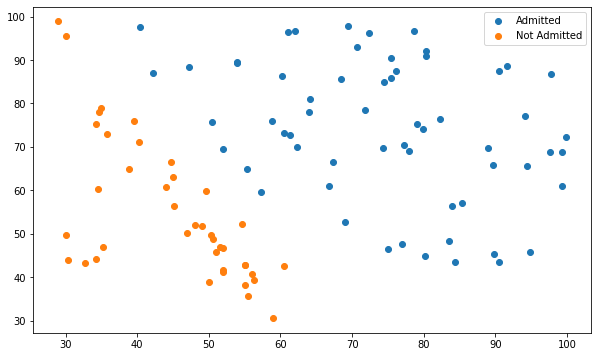

In [7]:
admitted = data.loc[data.admitted_or_not == 1]
not_admitted = data.loc[data.admitted_or_not == 0]
admitted_1st_col = admitted.iloc[:, 0];
admitted_2nd_col = admitted.iloc[:, 1];

not_admitted_1st_col = not_admitted.iloc[:, 0];
not_admitted_2nd_col = not_admitted.iloc[:, 1];

fig, ax = plt.subplots(figsize=(10,6))
    
    
plt.scatter(admitted_1st_col,admitted_2nd_col,label='Admitted')
plt.scatter(not_admitted_1st_col,not_admitted_2nd_col,label='Not Admitted')
plt.legend()
plt.show()

## Now it has become linearly separable dataset

In [8]:
for i in range (len(Y)):
    if Y[i]==0:
        Y[i]=-1

In [9]:
X=np.array(X)
X=list(X)

In [10]:
len(X),len(Y)

(100, 100)

# Train Test Split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1) 

In [12]:
A=[]
for i in range(len(X_train)):
    A.append(list(y_train[i]*X_train[i]))

In [13]:
B= [-1]*len(X_train)
C=[0]*number_of_cols
A=pd.DataFrame(A)

In [14]:
A.shape,len(B),len(C)

((70, 2), 70, 2)

# Applying the classifier

In [15]:
res=linprog(C,A_ub=A,b_ub=B)

In [16]:
W=res.x

In [17]:
print(W)

[2.35060908 2.36342323]


In [18]:
test=[]
for i in range(len(X_test)):
    test.append(list(y_test[i]*X_test[i]))

# Prediction

In [19]:
prediction=[]
for i in range(len(X_test)):
    if sum(W*test[i])>0:
        prediction.append(1)
    else:
        prediction.append(-1)

In [20]:
prediction

[1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 -1]

In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, prediction)*100

100.0